In [ ]:
$ mkdir -p ~/aiffel/camera_sticker/models
$ mkdir -p ~/aiffel/camera_sticker/images
$ ln -s ~/data/* ~/aiffel/camera_sticker/images

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib
print("üå´üõ∏")

üå´üõ∏


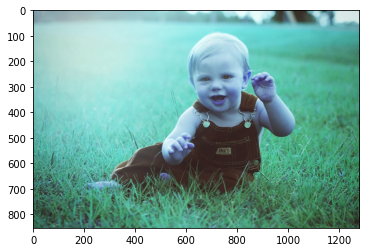

In [213]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/baby.jpg'
img_bgr = cv2.imread(my_image_path)    # Ïù¥ÎØ∏ÏßÄ Ï≤òÎ¶¨Î•º ÏúÑÌï¥ OpenCVÏôÄ ÎÖ∏Ìä∏Î∂ÅÏóêÏÑú Ïù¥ÎØ∏ÏßÄ Ï∂úÎ†•ÏùÑ ÏúÑÌïú matplotlib Î∂àÎü¨Ïò§Í∏∞
img_show = img_bgr.copy()      # Ï∂úÎ†•Ïö© Ïù¥ÎØ∏ÏßÄÎ•º Îî∞Î°ú Î≥¥Í¥Ä, Ï§ÄÎπÑÌïú Ïù¥ÎØ∏ÏßÄ ÏùΩÍ∏∞
plt.imshow(img_bgr)
plt.show()

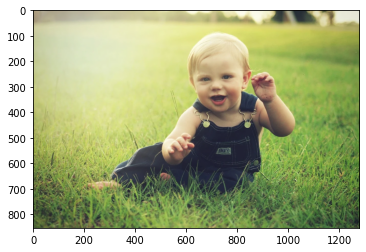

In [214]:
# plt.imshow Ïù¥Ï†ÑÏóê RGB Ïù¥ÎØ∏ÏßÄÎ°ú Î∞îÍæ∏Îäî Í≤ÉÏùÑ ÏûäÏßÄÎßàÏÑ∏Ïöî. 
# matplotlib, dlib Îì±Ïùò Ïù¥ÎØ∏ÏßÄ ÎùºÏù¥Î∏åÎü¨Î¶¨Îäî Ïù¥ÎØ∏ÏßÄ Ï±ÑÎÑêÏùÑ RGB(Îπ®Í∞ï, ÎÖπÏÉâ, ÌååÎûë) ÏàúÏúºÎ°ú ÏÇ¨Ïö©, Í∑∏Îü∞Îç∞ opencvÎäî ÏòàÏô∏Ï†ÅÏúºÎ°ú BGR(ÌååÎûë, ÎÖπÏÉâ, Îπ®Í∞ï)ÏùÑ ÏÇ¨Ïö©
# opencvÏóêÏÑú Îã§Î£¨ Ïù¥ÎØ∏ÏßÄÎ•º Îã§Î•∏ Ïù¥ÎØ∏ÏßÄ ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º ÌôúÏö©ÌïòÏó¨ Ï∂úÎ†•ÌïòÎ†§Î©¥ ÏïÑÎûòÏôÄ Í∞ôÏùÄ ÏÉâÍπî Î≥¥Ï†ïÏ≤òÎ¶¨Î•º Ìï¥Ï£ºÍ≤å ÎêúÎã§.
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [215]:
# dlibÏùÑ ÌôúÏö©Ìï¥ hog detectorÎ•º ÏÑ†Ïñ∏Ìï©ÎãàÎã§
detector_hog = dlib.get_frontal_face_detector()
print("üå´üõ∏")

üå´üõ∏


In [216]:
# detector_hogÎ•º Ïù¥Ïö©Ìï¥ÏÑú ÏñºÍµ¥Ïùò bounding boxÎ•º Ï∂îÏ∂ú
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
print("üå´üõ∏")

üå´üõ∏


rectangles[[(613, 192) (835, 415)]]


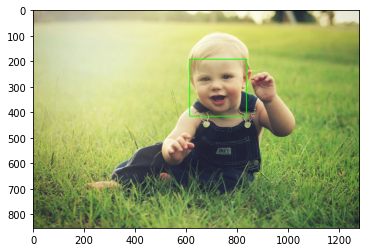

In [195]:
# Ï∞æÏùÄ ÏñºÍµ¥ ÏòÅÏó≠ Î∞ïÏä§ Î¶¨Ïä§Ìä∏
# dlib detector Îäî dlib.rectangles ÌÉÄÏûÖÏùò Í∞ùÏ≤¥Î•º Î∞òÌôò, dlib.rectangles Îäî dlib.rectangle Í∞ùÏ≤¥Ïùò Î∞∞Ïó¥ ÌòïÌÉúÎ°ú Ïù¥Î£®Ïñ¥Ï†∏ ÏûàÎã§.
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # dlib.rectangleÍ∞ùÏ≤¥Îäî left(), top(), right(), bottom(), height(), width() Îì±Ïùò Î©§Î≤Ñ Ìï®ÏàòÎ•º Ìè¨Ìï®

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [ ]:
# DlibÏùò Ï†úÍ≥µÎêòÎäî Î™®Îç∏ÏùÑ ÏÇ¨Ïö©ÌïòÍ∏∞. Î®ºÏ†Ä Í≥µÍ∞úÎêòÏñ¥ ÏûàÎäî weight fileÏùÑ Îã§Ïö¥Î°úÎìú, Ìï¥Îãπ Î™®Îç∏ÌååÏùºÏùÄ bz2 ÏïïÏ∂ïÌååÏùº ÌòïÌÉúÎ°ú Ï†úÍ≥µÎêòÏñ¥ ÏïïÏ∂ïÏùÑ ÌíÄÏñ¥Ï§Ä ÌõÑ ÏÇ¨Ïö©
$ wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
$ mv shape_predictor_68_face_landmarks.dat.bz2 ~/aiffel/camera_sticker/models
$ cd ~/aiffel/camera_sticker && bzip2 -d ./models/shape_predictor_68_face_landmarks.dat.bz2

In [217]:
# Ï†ÄÏû•Ìïú landmark Î™®Îç∏ÏùÑ Î∂àÎü¨Ïò§Í∏∞
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("üå´üõ∏")  # landmark_predictor Îäî RGB Ïù¥ÎØ∏ÏßÄÏôÄ dlib.rectangleÏùÑ ÏûÖÎ†• Î∞õÏïÑ dlib.full_object_detection Î•º Î∞òÌôòÌïúÎã§.

üå´üõ∏


In [218]:
# points Îäî dlib.full_object_detection Ïùò Í∞ùÏ≤¥Ïù¥Í∏∞ ÎïåÎ¨∏Ïóê parts() Ìï®ÏàòÎ°ú Í∞úÎ≥Ñ ÏúÑÏπòÏóê Ï†ëÍ∑ºÌï† Ïàò ÏûàÎã§. Ï°∞Í∏à Îçî ÏßÅÍ¥ÄÏ†ÅÏù∏ (x, y) ÌòïÌÉúÎ°ú Ï†ëÍ∑ºÌï† Ïàò ÏûàÎèÑÎ°ù Î≥ÄÌôò
list_landmarks = []

# ÏñºÍµ¥ ÏòÅÏó≠ Î∞ïÏä§ ÎßàÎã§ face landmarkÎ•º Ï∞æÏïÑÎÉÖÎãàÎã§
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    
    # face landmark Ï¢åÌëúÎ•º Ï†ÄÏû•Ìï¥Îë°ÎãàÎã§
    list_points = list(map(lambda p: (p.x, p.y), points.parts())) # list_points Îäî tuple (x, y) 68Í∞úÎ°ú Ïù¥Î£®Ïñ¥ÏßÑ Î¶¨Ïä§Ìä∏Í∞Ä  ÎêúÎã§. 
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


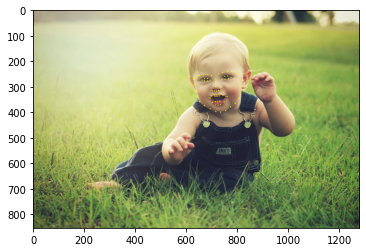

In [219]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()   # ÎûúÎìúÎßàÌÅ¨ ÏòÅÏÉÅ Ï∂úÎ†•

In [220]:
# Ïä§Ìã∞Ïª§ Ï†ÅÏö©ÌïòÍ∏∞
# Ï¢åÌëú ÌôïÏù∏ÌïòÍ∏∞
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # ÏΩîÏùò indexÎäî 30ÏûÖÎãàÎã§
    x = landmark[30][0]
    y = landmark[8][1] - dlib_rect.height()//2
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))  # 

(714, 298)
(x,y) : (714,287)
(w,h) : (223,223)


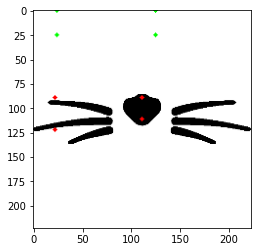

In [221]:
cat_list1 = [(w//2, int(w*0.4)), (int(w*0.1), int(w*0.4)), (int(w*0.1), int(w*0.55)), (w//2, w//2)]
cat_list2 = [(125,0),(24,0),(24,25),(125,25)]
for point in cat_list1:

    cv2.circle(sticker_copy, point, 2, (255, 0, 0), -1)
for point in cat_list2: 
    cv2.circle(sticker_copy, point, 2, (0, 255, 0), -1)
    
plt.imshow(sticker_copy)
plt.show()    


In [222]:
sticker_copy = img_sticker.copy()

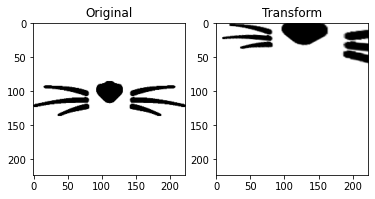

In [223]:
pts1 = np.float32(cat_list1) # Ïù¥Îèô Ï†Ñ Ïä§Ìã∞Ïª§Ïùò Ï¢åÌëú
pts2 = np.float32(cat_list2) # Ïù¥Îèô ÌõÑ Ïä§Ìã∞Ïª§Ïùò Ï¢åÌëú
M = cv2.getPerspectiveTransform(pts1,pts2) # Î≥ÄÌôòÏãúÏºúÏ£ºÎäî Îß§Ìä∏Î¶≠Ïä§
dst = cv2.warpPerspective(img_sticker,M,(w,h), borderValue = [255, 255, 255, 255]) 
# Ïã§Ï†úÎ°ú Ïù¥ÎØ∏ÏßÄÎ•º MÏùÑ Ïù¥Ïö©Ìï¥ Î≥ÄÌôòÌï¥Ï£ºÎäî ÏΩîÎìú # ÌöåÏ†ÑÏãúÏº∞ÏùÑ Îïå Í≤ÄÏùÄ Î∞∞Í≤ΩÏùÑ ÏóÜÏï†Í∏∞ ÏúÑÌï¥ borderValue ÏÑ§Ï†ï
plt.subplot(121),plt.imshow(img_sticker),plt.title('Original')
plt.subplot(122),plt.imshow(dst,),plt.title('Transform')
plt.show()

In [224]:
refined_x = int(x - cat_list2[0][0])
refined_y = int(y - cat_list2[0][1]) # top

In [225]:
sticker_area2 = img_bgr[refined_y:refined_y+dst.shape[0], refined_x:refined_x+dst.shape[1]]
img_bgr[refined_y:refined_y+dst.shape[0], refined_x:refined_x+dst.shape[1]] = \
    np.where(dst==0, cv2.addWeighted(dst, 0.2, sticker_area2, 0.2, 0), sticker_area2).astype(np.uint8)

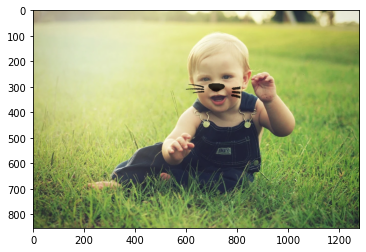

In [226]:
plt.subplot(),plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

In [227]:
# ÍπÄÍµ¨Îùº ÏÇ¨ÏßÑÏóê Í≥†ÏñëÏù¥ ÏàòÏóº Î∂ôÏù¥Í∏∞

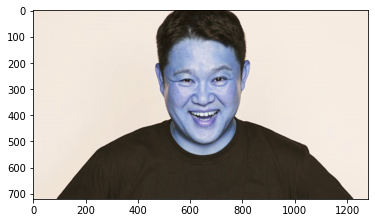

In [228]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image_kim.jpg'
img_bgr = cv2.imread(my_image_path)    # OpenCVÎ°ú Ïù¥ÎØ∏ÏßÄÎ•º Î∂àÎü¨ÏòµÎãàÎã§
img_show = img_bgr.copy()      # Ï∂úÎ†•Ïö© Ïù¥ÎØ∏ÏßÄÎ•º Îî∞Î°ú Î≥¥Í¥ÄÌï©ÎãàÎã§
plt.imshow(img_bgr)
plt.show()

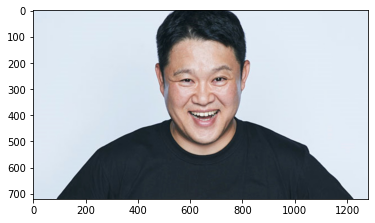

In [229]:
# plt.imshow Ïù¥Ï†ÑÏóê RGB Ïù¥ÎØ∏ÏßÄÎ°ú Î∞îÍæ∏Îäî Í≤ÉÏùÑ ÏûäÏßÄÎßàÏÑ∏Ïöî. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [230]:
# detectorÎ•º ÏÑ†Ïñ∏Ìï©ÎãàÎã§
detector_hog = dlib.get_frontal_face_detector()
print("üå´üõ∏")

üå´üõ∏


In [231]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
print("üå´üõ∏")

üå´üõ∏


rectangles[[(491, 170) (812, 491)]]


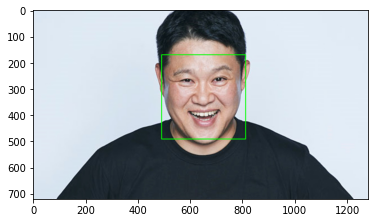

In [232]:
# Ï∞æÏùÄ ÏñºÍµ¥ ÏòÅÏó≠ Î∞ïÏä§ Î¶¨Ïä§Ìä∏
# Ïó¨Îü¨ ÏñºÍµ¥Ïù¥ ÏûàÏùÑ Ïàò ÏûàÏäµÎãàÎã§
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [233]:
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("üå´üõ∏")

üå´üõ∏


In [234]:
list_landmarks = []

# ÏñºÍµ¥ ÏòÅÏó≠ Î∞ïÏä§ ÎßàÎã§ face landmarkÎ•º Ï∞æÏïÑÎÉÖÎãàÎã§
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark Ï¢åÌëúÎ•º Ï†ÄÏû•Ìï¥Îë°ÎãàÎã§
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


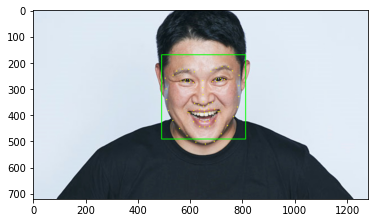

In [89]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [235]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # ÏΩîÏùò indexÎäî 30 ÏûÖÎãàÎã§
    x = landmark[30][0]
    y = landmark[30][1] + dlib_rect.height()//2
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(650, 349)
(x,y) : (650,510)
(w,h) : (322,322)


In [236]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat_ÏàòÏóº.jpg.png'
img_sticker = cv2.imread(sticker_path) # Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄÎ•º Î∂àÎü¨ÏòµÎãàÎã§
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(322, 322, 3)


In [237]:
refined_x = x - w // 2  # ÏÇ¨ÏßÑÍ≤ΩÎ°ú Î≥ÄÍ≤Ω ÌõÑ ÏàòÏ†ï
refined_y = y - h
print ('(x,y) : (%d,%d)'%(refined_x, refined_y)) 

(x,y) : (489,188)


In [238]:
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (489,188)


In [239]:
# Í∏∏Ïñ¥ÏÑú Î≥µÏû°Ìï¥ Î≥¥Ïù¥ÏßÄÎßå img_show[from:to] ÌòïÏãùÏûÖÎãàÎã§
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
print("Ïäù~")


Ïäù~


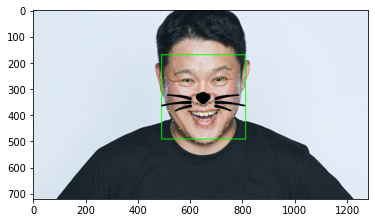

In [95]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
# ÏôÑÏÑ±~~
# ÌöåÍ≥†>
# Ï≤òÏùåÏóê ÏïÑÍ∏∞ ÏÇ¨ÏßÑÏùò Í≤ΩÏö∞ Í≥†ÏñëÏù¥ ÏàòÏóºÏä§Ìã∞Ïª§Î•º Î∂ÄÏ∞©ÌïòÍ≥† ÌïòÏñÄÏÉâ Î©¥Ïù¥ ÎÇòÌÉÄÎÇòÏÑú Í≥†ÎØº... 
#ÏïÑÍ∏∞Ïùò ÏñºÍµ¥Ïù¥ ÏûëÏïÑÏÑú  y = landmark[30][1] + dlib_rect.height()//2Ïù¥ Î∂ÄÎ∂ÑÏóêÏÑú ÎÇòÎàÑÎäî Í∞íÏùÑ 3ÏúºÎ°úÎèÑ Ìï¥Î≥¥Í≥†, Í≤∞Íµ≠ÏùÄ ÌçºÏã§ÎãòÏùò ÎèÑÏõÄÏúºÎ°ú ÏôÑÏÑ±

# ÍπÄÍµ¨Îùº ÏÇ¨ÏßÑÏùÄ ÎÖ∏ÎìúÏóê ÏûàÎäîÎç∞Î°ú Ï†ÅÏö©ÌñàÍ≥† ÏïÑÍ∞Ä ÏÇ¨ÏßÑÍ≥º ÎßàÏ∞¨Í∞ÄÏßÄÎ°ú ÌïòÏñÄÏÉâ Î©¥Ïù¥ ÎÇòÌÉÄÎÇ¨ÎäîÎç∞ Ïù¥ Î∂ÄÎ∂ÑÏóêÏÑú Í∞íÏùÑ 0Ïù¥ ÏïÑÎãå 255Î°ú ÏàòÏ†ïÌï¥ÏÑú Ï†ïÎ¶¨Îê®  np.where(img_sticker==255